In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data_csv/amiwea.csv", parse_dates=["timestamp"])
df = df.set_index("timestamp")

시간대 컬럼 생성 

In [2]:
df["hour"] = df.index.hour

시간대별 평균 전력소비 그래프
- 하루 중 피크 시간대 명확
- 저부하 고부하 구간 구분 가능 
- 수요 반응 (DR), EMS 제어 논리로 바로 연결 

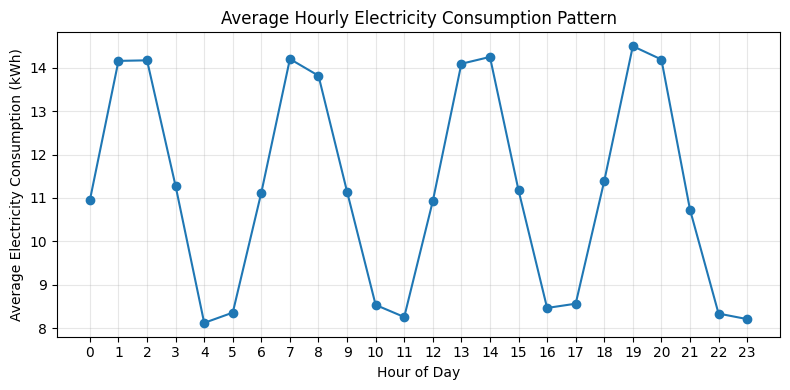

In [3]:
hourly_mean = df.groupby("hour")["consumption"].mean()

plt.figure(figsize=(8, 4))
plt.plot(hourly_mean.index, hourly_mean.values, marker="o")
plt.xlabel("Hour of Day")
plt.ylabel("Average Electricity Consumption (kWh)")
plt.title("Average Hourly Electricity Consumption Pattern")
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

요일별 패턴 

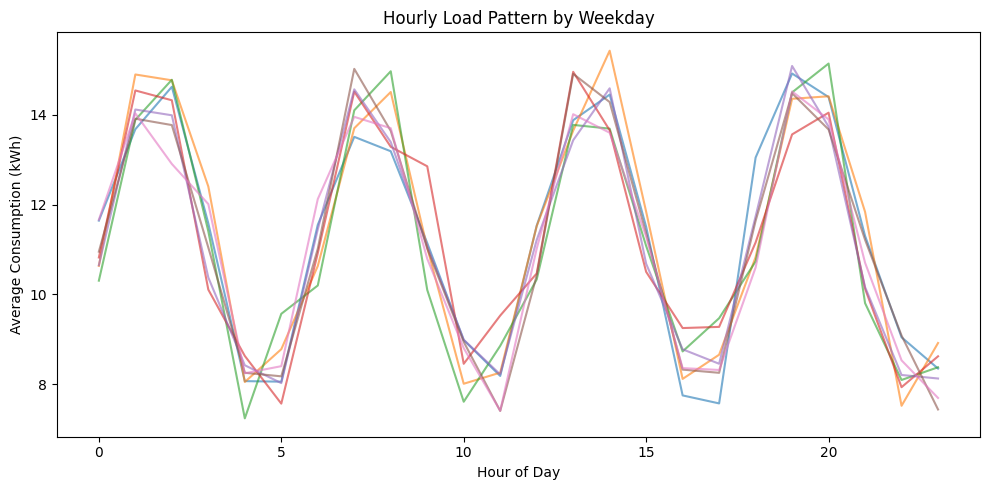

In [4]:
df["weekday"] = df.index.weekday

weekday_hourly = df.groupby(["weekday", "hour"])["consumption"].mean().unstack()

plt.figure(figsize=(10, 5))
for day in weekday_hourly.index:
    plt.plot(weekday_hourly.columns, weekday_hourly.loc[day], alpha=0.6)

plt.xlabel("Hour of Day")
plt.ylabel("Average Consumption (kWh)")
plt.title("Hourly Load Pattern by Weekday")
plt.tight_layout()
plt.show()

“시간대별 평균 전력 소비를 분석한 결과,
일중 부하 패턴이 뚜렷하게 나타났으며,
이는 피크 관리 및 에너지 관리 시스템(EMS)을 통한
예측 기반 제어의 필요성을 보여준다.”
